In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)
df.columns = df.columns.str.lower().str.replace(' ', '_')

if 'reviews_per_month' in df.columns:
    df['reviews_per_month'].fillna(0, inplace=True)
if 'license' in df.columns:
    df.drop(['license'], axis=1, inplace=True)
for col in ['price', 'service_fee']:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
        df[col].fillna(df[col].median(), inplace=True)
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlim(0, 1000)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

if 'neighbourhood_group' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
    plt.title('Listings by Neighbourhood Group')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Count')
    plt.show()

if 'room_type' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
    plt.title('Listings by Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Count')
    plt.show()

if 'host_id' in df.columns and 'name' in df.columns:
    top_hosts = df['host_id'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_hosts.index.astype(str), y=top_hosts.values)
    plt.xticks(rotation=45)
    plt.title('Top 10 Hosts by Number of Listings')
    plt.xlabel('Host ID')
    plt.ylabel('Number of Listings')
    plt.show()

if 'availability_365' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['availability_365'], bins=50, kde=False)
    plt.title('Availability (days per year)')
    plt.xlabel('Days Available')
    plt.ylabel('Count')
    plt.show()

In [2]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# --- Step 1: Clean price & service_fee safely ---
if 'price' in df.columns:   # only if original column exists
    df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
    df['price'] = df['price'].str.replace(',', '', regex=False)

if 'service_fee' in df.columns:
    df['service_fee'] = df['service_fee'].astype(str).str.replace('$', '', regex=False)
    df['service_fee'] = df['service_fee'].str.replace(',', '', regex=False)

# --- Step 2: Rename only if not already renamed ---
df.rename(columns={
    'price': 'price_$',
    'service_fee': 'service_fee_$'
}, inplace=True)

# --- Step 3: Handle missing values ---
df.dropna(inplace=True)

# --- Step 4: Convert datatypes safely ---
if 'price_$' in df.columns:
    df['price_$'] = pd.to_numeric(df['price_$'], errors='coerce')

if 'service_fee_$' in df.columns:
    df['service_fee_$'] = pd.to_numeric(df['service_fee_$'], errors='coerce')

if 'id' in df.columns:
    df['id'] = df['id'].astype(str)

if 'host_id' in df.columns:
    df['host_id'] = pd.to_numeric(df['host_id'], errors='coerce')

if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

if 'construction_year' in df.columns:
    df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce')

# --- Step 5: Fix neighbourhood_group typo safely ---
if 'neighbourhood_group' in df.columns:
    df.loc[df['neighbourhood_group'].str.lower() == 'brookln', 'neighbourhood_group'] = 'Brooklyn'

# --- Step 6: Remove invalid availability safely ---
if 'availability_365' in df.columns:
    df = df.drop(df[df['availability_365'] > 500].index)

# Final cleaning of NaNs after conversions
df.dropna(inplace=True)


In [3]:
df.duplicated().value_counts()

False    39421
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39421 entries, 0 to 102040
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              39421 non-null  object        
 1   name                            39421 non-null  object        
 2   host_id                         39421 non-null  int64         
 3   host_identity_verified          39421 non-null  object        
 4   host_name                       39421 non-null  object        
 5   neighbourhood_group             39421 non-null  object        
 6   neighbourhood                   39421 non-null  object        
 7   lat                             39421 non-null  float64       
 8   long                            39421 non-null  float64       
 9   country                         39421 non-null  object        
 10  country_code                    39421 non-null  object        
 11  instan

In [5]:
property_types = df['room_type'].value_counts().to_frame()
property_types

,count
room_type,
Entire home/apt,20123
Private room,18473
Shared room,825


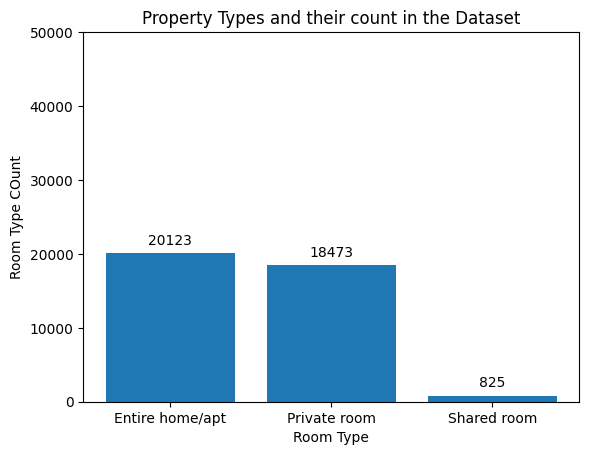

In [6]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel("Room Type COunt");
plt.title('Property Types and their count in the Dataset');

In [7]:
hood_group = df['neighbourhood_group'].value_counts().to_frame()
hood_group

,count
neighbourhood_group,
Manhattan,16660
Brooklyn,16657
Queens,4820
Bronx,925
Staten Island,359


In [12]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price_$', 'service_fee_$', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

Text(0.5, 1.0, 'Which Neighborhood Groups has the highest number of listings')

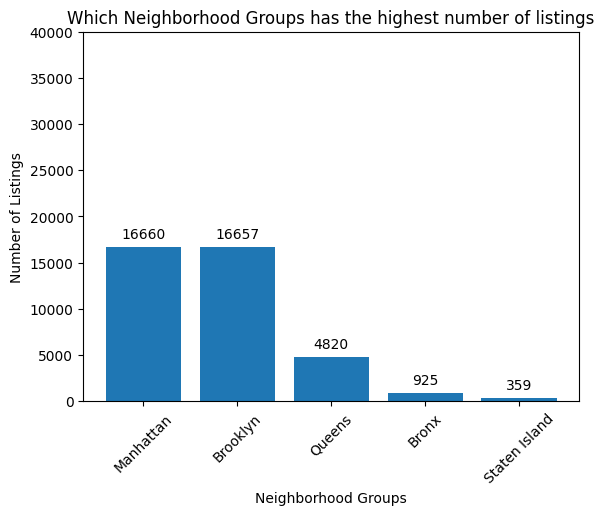

In [15]:
hood_group = df['neighbourhood_group'].value_counts().to_frame()
hood_group.columns = ["count"]  # Rename the column to 'count'

hood_group_bar = plt.bar(hood_group.index, hood_group["count"])
plt.bar_label(hood_group_bar, labels=hood_group["count"], padding=4)
plt.ylim([0,40000])
plt.xlabel("Neighborhood Groups")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.title("Which Neighborhood Groups has the highest number of listings")

Text(0.5, 1.0, 'Average Price per Listings ($) in each Neighborhood Group')

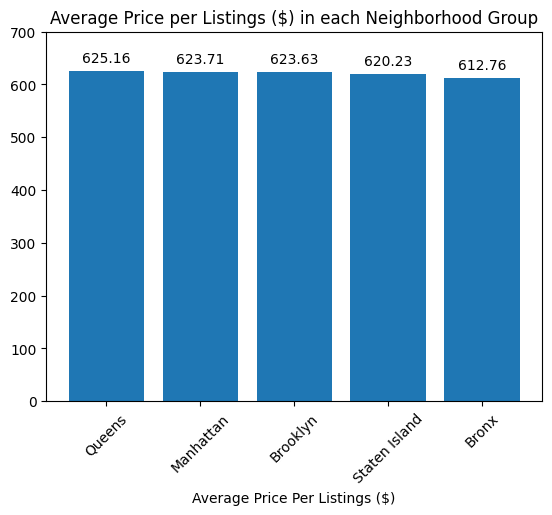

In [16]:
avg_price = df.groupby('neighbourhood_group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"])
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"],2),label_type='edge', padding=4)
plt.ylim([0,700])
plt.xlabel("Average Price Per Listings ($)")
plt.xticks(rotation = 45)
plt.title('Average Price per Listings ($) in each Neighborhood Group')

Text(0.5, 1.0, 'Average Price ($) for Properties in each Construction Year')

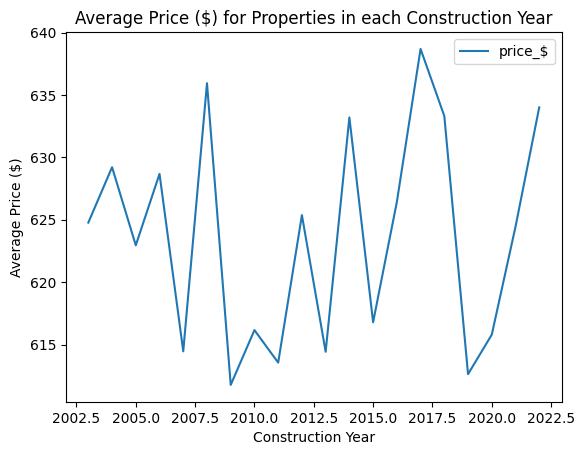

In [17]:
df.groupby(df['construction_year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')

Text(0.5, 1.0, 'Top 10 Hosts by Number of Listings')

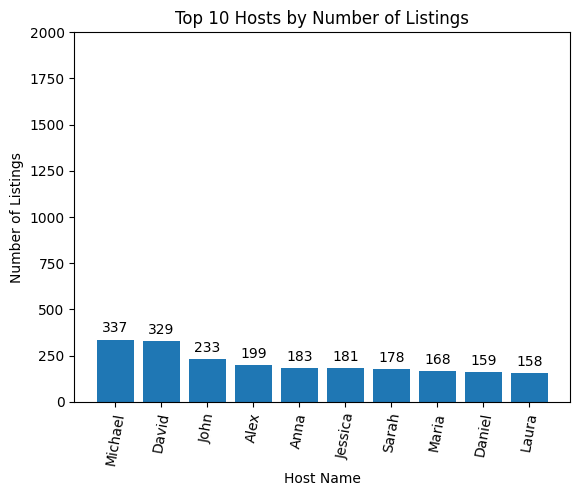

In [36]:
hosts = df.groupby('host_name').size().sort_values(ascending=False).nlargest(10).to_frame(name='count')
hosts_bar = plt.bar(hosts.index, hosts['count'])
plt.bar_label(hosts_bar, labels=hosts['count'], label_type='edge', padding=3)
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=80)
plt.ylim([0, 2000])
plt.title('Top 10 Hosts by Number of Listings')

In [21]:
print(df.columns.tolist())

['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price_$', 'service_fee_$', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules']


In [22]:
review = df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending=False).to_frame()
review

,review_rate_number
host_identity_verified,
verified,3.224945
unconfirmed,3.216390


In [24]:
review = df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending=False).to_frame()
review

,review_rate_number
host_identity_verified,
verified,3.224945
unconfirmed,3.216390


Text(0.5, 1.0, 'Average Review Rate for each verification statistics.')

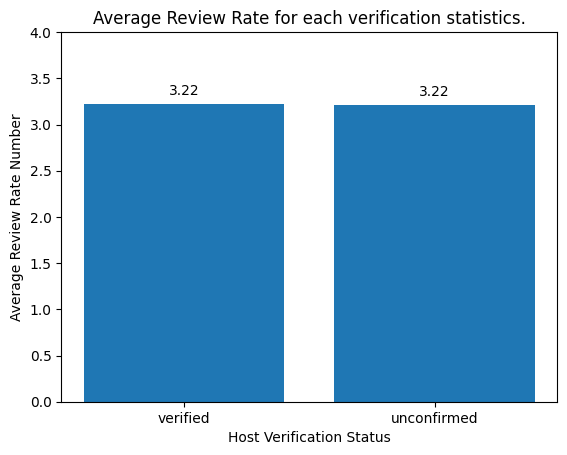

In [25]:
review_bar = plt.bar(review.index, review["review_rate_number"])
plt.bar_label(review_bar, labels=round(review["review_rate_number"], 2), padding=4)
plt.ylim([0,4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for each verification statistics.')

Text(0.5, 1.0, 'Average Review Rate for each Verification Status')

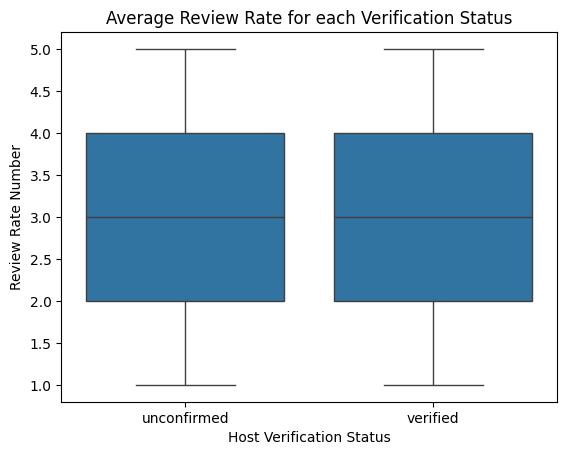

In [27]:
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x="host_identity_verified", y="review_rate_number", color=base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Verification Status')

In [28]:
df['price_$'].corr(df['service_fee_$'])

0.9999909483489295

Text(0.5, 1.0, 'A Regression Plot showing the Correlation of the Price of a listing and its Service Fee.')

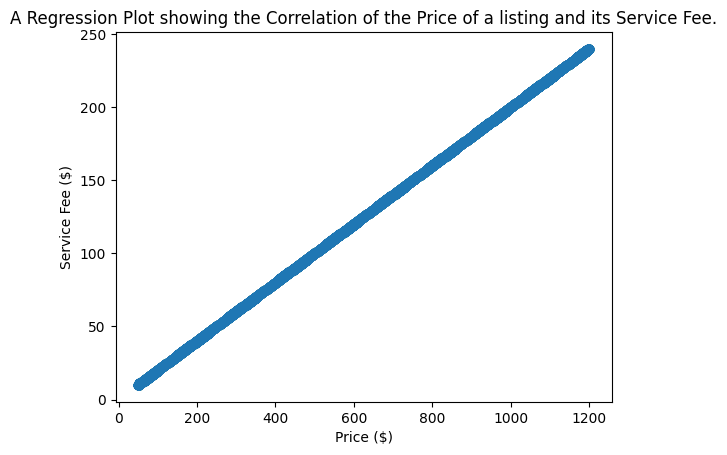

In [29]:
sns.regplot(df, x='price_$', y='service_fee_$')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A Regression Plot showing the Correlation of the Price of a listing and its Service Fee.')

In [31]:
ARRN = df.groupby(['neighbourhood_group', 'room_type'])['review_rate_number'].mean().to_frame()
ARRN

review_rate_number
neighbourhood_group room_type                          
Bronx               Entire home/apt            3.347962
                    Private room               3.182469
                    Shared room                3.297872
Brooklyn            Entire home/apt            3.184459
                    Private room               3.229835
                    Shared room                3.287234
Manhattan           Entire home/apt            3.211721
                    Private room               3.236241
                    Shared room                3.236111
Queens              Entire home/apt            3.249723
                    Private room               3.236294
                    Shared room                3.272727
Staten Island       Entire home/apt            3.303030
                    Private room               3.405263
                    Shared room                3.750000

Text(0.5, 1.0, 'Average Review Rate for each room/property type in each Neighborhood Group')

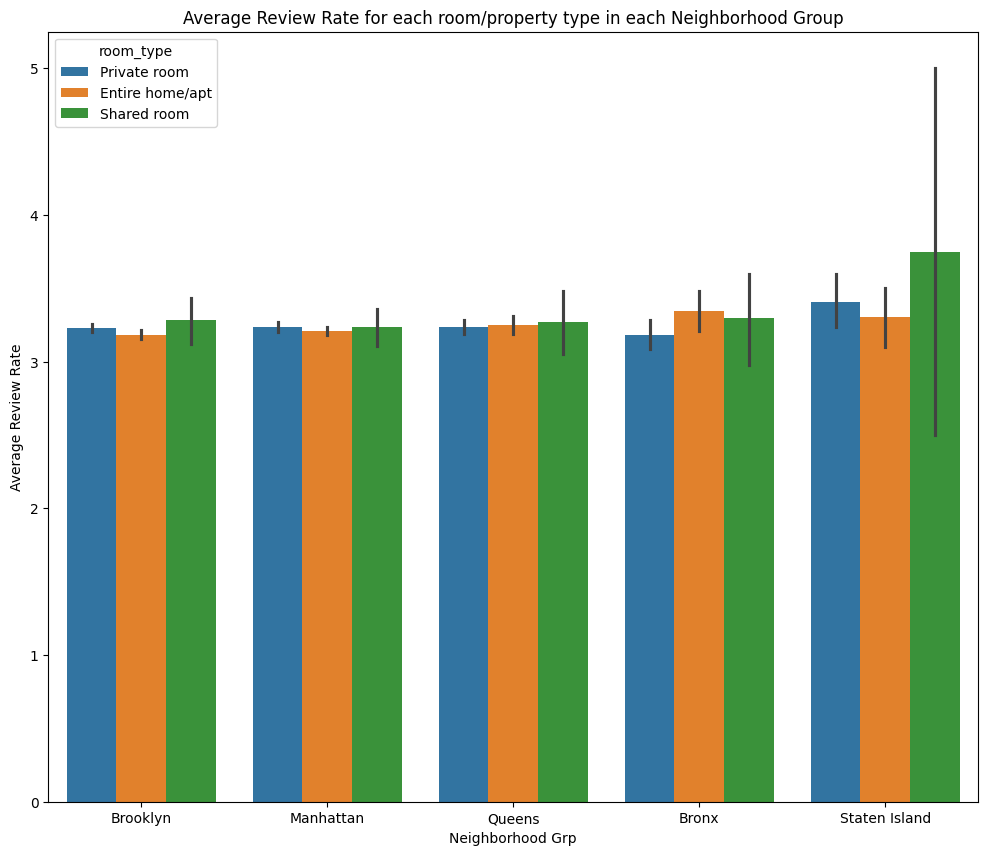

In [32]:
plt.figure(figsize=[12, 10])
sns.barplot(data=df, x='neighbourhood_group', y='review_rate_number', hue='room_type')
plt.xlabel('Neighborhood Grp')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each room/property type in each Neighborhood Group')

Text(0.5, 1.0, 'A Regression Plot of the relationship b/w Calculated Host Listings and Availability 365')

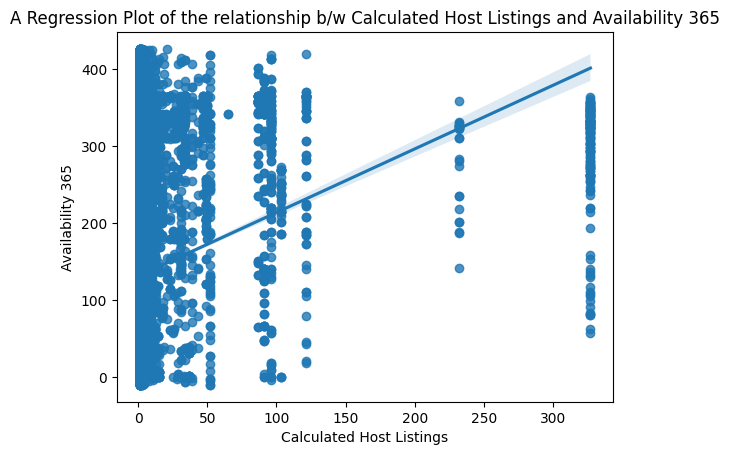

In [33]:
sns.regplot(df, x='calculated_host_listings_count', y='availability_365')
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the relationship b/w Calculated Host Listings and Availability 365')

In [34]:
df['calculated_host_listings_count'].corr(df['availability_365'])

0.1448078408696362